# Análise de dados de vendas em diferentes lojas

In [1]:
# Importando os dados como dataframe pandas
import pandas as pd

files = ["Aracaju", "Fortaleza", "Natal", "Recife", "Salvador"]
var_names = ["df" + str(n) for n in range(1, len(files)+1)]
for i in range(len(files)):
    vars()[var_names[i]] = pd.read_excel("datasets//" + files[i] + ".xlsx")

In [2]:
df1.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [3]:
# Importando os dados como dataframe pandas de forma tipica

df1 = pd.read_excel("datasets//Aracaju.xlsx")
df2 = pd.read_excel("datasets//Fortaleza.xlsx")
df3 = pd.read_excel("datasets//Natal.xlsx")
df4 = pd.read_excel("datasets//Recife.xlsx")
df5 = pd.read_excel("datasets//Salvador.xlsx")

# Juntando todos os arquivos
df = pd.concat([df1, df2, df3, df4, df5])
df.head(10)

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8
5,Aracaju,2018-01-01,156.20,1522,1
6,Aracaju,2018-01-01,35.50,1522,2
7,Aracaju,2019-01-01,172.22,1522,6
8,Aracaju,2019-01-01,12.16,1523,1
9,Aracaju,2019-01-01,149.36,1523,3


In [4]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [5]:
# Mudando o tipo de dado da coluna LojaID
df["LojaID"] = df["LojaID"].astype(object)

In [6]:
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde
187,Natal,2019-01-02,3.85,1035,3
180,Salvador,2019-01-02,116.63,1035,2
108,Natal,2019-01-02,11.72,1037,1
48,Recife,2019-01-01,141.19,980,7
15,Recife,2019-01-01,7.45,981,2
89,Recife,2019-01-01,18.11,980,3
226,Salvador,2019-01-02,38.32,1035,2
102,Fortaleza,2019-01-01,13.99,1004,3
109,Recife,2019-03-02,18.90,982,6
186,Salvador,2019-01-02,169.09,1036,2


In [7]:
# Consulta de dados falatantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

Criando colunas novas

In [8]:
# Criando coluna de receita

df["Receita"] = df["Vendas"].mul(df["Qtde"])
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
211,Salvador,2019-01-02,141.05,1035,3,423.15
65,Recife,2019-01-01,4.01,981,1,4.01
106,Fortaleza,2019-01-01,28.42,1002,3,85.26
80,Natal,2018-05-23,264.00,852,3,792.00
81,Aracaju,2018-01-01,53.41,1520,2,106.82
188,Natal,2019-01-02,178.11,1035,3,534.33
9,Recife,2019-01-01,11.85,980,7,82.95
77,Natal,2019-04-01,426.00,853,3,1278.00
109,Recife,2019-03-02,18.90,982,6,113.40
110,Recife,2019-03-02,51.98,983,6,311.88


In [9]:
# retornando a mior receita

df["Receita"].max()

3544.0

In [10]:
# Top 3 das maiores receitas

df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [11]:
# As 3 piores receitas
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [12]:
# Agrupamento por cidade

df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

Trabalhando com datas

In [13]:
# trasformando a coluna de data

df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [14]:
# Criando uma nova coluna com o ano

df["Ano_Venda"] = df["Data"].dt.year

In [15]:
df.sample(6)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
104,Recife,2019-01-01,40.11,983,5,200.55,2019
17,Recife,2019-02-14,142.45,981,3,427.35,2019
7,Natal,2019-03-18,886.00,853,4,3544.00,2019
153,Salvador,2019-01-02,17.41,1035,2,34.82,2019
108,Recife,2019-03-02,152.89,981,4,611.56,2019
156,Salvador,2019-01-02,36.14,1037,3,108.42,2019


In [16]:
# Extraindo o mes e o dia
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda
0,Aracaju,2018-01-01,142.00,1520,1,142.00,2018,1,1
1,Aracaju,2018-01-01,14.21,1522,6,85.26,2018,1,1
2,Aracaju,2018-01-01,71.55,1520,1,71.55,2018,1,1
3,Aracaju,2018-01-01,3.01,1521,7,21.07,2018,1,1
4,Aracaju,2018-01-01,24.51,1522,8,196.08,2018,1,1


In [17]:
# Calcular a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [18]:
# Calculando a diferenca de dias

df["diferenca_dias"] = df["Data"] - df["Data"].min()

df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dias
117,Natal,2019-01-02,39.41,1034,1,39.41,2019,1,2,366 days
70,Recife,2019-01-01,20.40,983,7,142.80,2019,1,1,365 days
120,Aracaju,2018-01-01,7.73,1520,10,77.30,2018,1,1,0 days
160,Natal,2019-01-02,11.76,1034,1,11.76,2019,1,2,366 days
12,Salvador,2019-01-01,125.05,1034,3,375.15,2019,1,1,365 days
55,Recife,2019-01-01,20.03,983,4,80.12,2019,1,1,365 days
130,Salvador,2019-03-02,59.78,1036,1,59.78,2019,3,2,425 days
64,Natal,2019-02-22,704.00,853,4,2816.00,2019,2,22,417 days
167,Salvador,2019-01-02,36.42,1037,1,36.42,2019,1,2,366 days
51,Aracaju,2018-01-01,40.58,1522,6,243.48,2018,1,1,0 days


In [19]:
# Criando a coluna de trimestre
df["semestre_venda"] = df["Data"].dt.quarter

df.head(6)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dias,semestre_venda
0,Aracaju,2018-01-01,142.00,1520,1,142.00,2018,1,1,0 days,1
1,Aracaju,2018-01-01,14.21,1522,6,85.26,2018,1,1,0 days,1
2,Aracaju,2018-01-01,71.55,1520,1,71.55,2018,1,1,0 days,1
3,Aracaju,2018-01-01,3.01,1521,7,21.07,2018,1,1,0 days,1
4,Aracaju,2018-01-01,24.51,1522,8,196.08,2018,1,1,0 days,1
5,Aracaju,2018-01-01,156.20,1522,1,156.20,2018,1,1,0 days,1


In [20]:
# Filtrando as vendas de 2019 do mes de marco

venda_marco = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

venda_marco.head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dias,semestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,2019,3,2,425 days,1
113,Fortaleza,2019-03-02,38.63,980,2,77.26,2019,3,2,425 days,1
114,Fortaleza,2019-03-02,16.82,983,4,67.28,2019,3,2,425 days,1
115,Fortaleza,2019-03-02,12.23,981,3,36.69,2019,3,2,425 days,1
116,Fortaleza,2019-03-02,79.10,982,2,158.20,2019,3,2,425 days,1
117,Fortaleza,2019-03-02,15.42,983,8,123.36,2019,3,2,425 days,1


# Visualização de dados

In [21]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1002     30
1005     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

<AxesSubplot:>

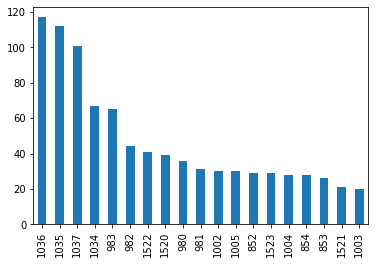

In [22]:
df["LojaID"].value_counts(ascending=False).plot.bar()

<AxesSubplot:>

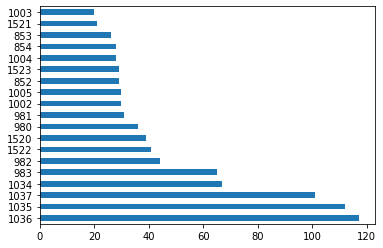

In [23]:
# Grafico de barras horizontais
df["LojaID"].value_counts(ascending=False).plot.barh()

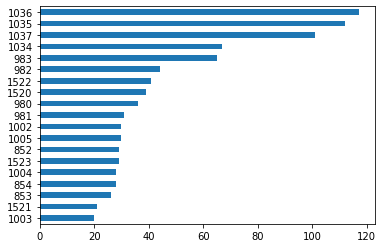

In [25]:
# Grafico de barras horizontais
df["LojaID"].value_counts(ascending=True).plot.barh();

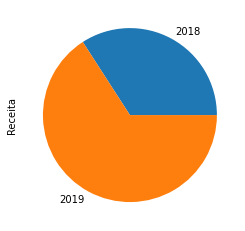

In [27]:
# Grafico de pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

Text(0, 0.5, 'Total Vendas')

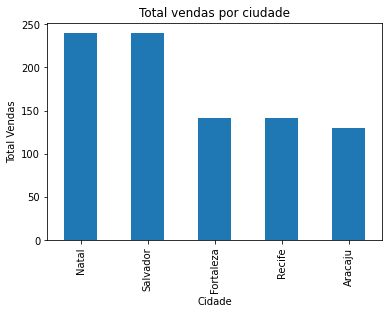

In [31]:
# Total vendas por cidade

import matplotlib.pyplot as plt

df["Cidade"].value_counts().plot.bar(title="Total vendas por ciudade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas")


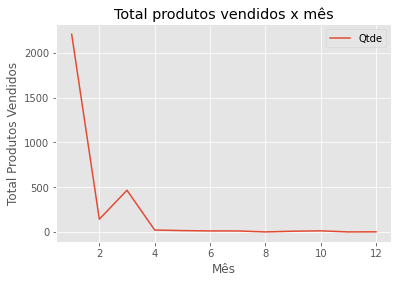

In [37]:
# Alterando o estilo

plt.style.use("ggplot");
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title = "Total produtos vendidos x mês");
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend();


In [38]:
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [39]:
#Selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

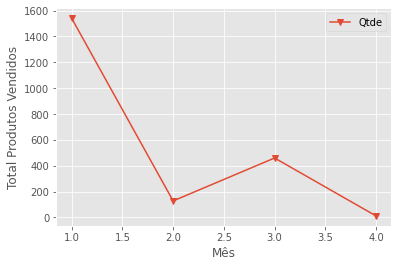

In [40]:
# Total produtos vendidos por mês
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend()

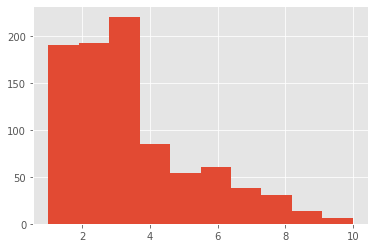

In [42]:
# Histograma
plt.hist(df["Qtde"]);